In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the mfcc features from the .npy file
mfcc_features = np.load("/home/hiddenrock/MPDD/MPDD-Elderly/Training/1s/Audio/opensmile/1_A_1_audio_features.npy")  # Replace with your actual file path

# Step 2: Check the type to ensure it's a NumPy array
print("Type of the loaded object:", type(mfcc_features))

# Step 3: Print out the shape of the array to understand its dimensions
print("Shape of the mfcc features array:", mfcc_features.shape)

# Step 4: Optionally, print the array contents
# print("Contents of the mfcc features array:")
# print(mfcc_features)



Type of the loaded object: <class 'numpy.ndarray'>
Shape of the mfcc features array: (11, 6373)


The output you’re seeing shows that each file contains a NumPy array with a shape like *(number_of_frames, 64)*. Here’s what that means in detail:

1. **Two-Dimensional Array:**  
   Each file is an array with two dimensions.  
   - **First Dimension (Rows):** Represents the number of frames extracted from the audio file. The number of frames can differ depending on the length of the audio and how the MFCC extraction was configured (e.g., frame length, hop length).  
   - **Second Dimension (Columns):** Is consistently 64, which means each frame is represented as a 64-dimensional feature vector.

2. **The 64-Dimensional Embedding:**  
   When you mention that "The embedding for the MFCC is 64", you are referring to the fact that each audio frame is transformed into a 64-length vector. This vector is the MFCC embedding, encapsulating the spectral properties of the audio within the mel-scale frequency bands.  
   - If your MFCC extraction configuration is set to compute 64 coefficients per frame, this directly results in an embedding size of 64.

3. **Why Different Number of Frames?**  
   The first number in the shape (e.g., 4, 43, 6, or 11) represents how many frames have been extracted for that particular audio sample. Different audio files may have different lengths or properties, leading to a different number of computed frames, while the dimensionality of the feature (64) stays the same.

### Summary

- **Shape \((n, 64)\):**  
  - \(n\): Varies per file; indicates the number of frames (time slices).
  - 64: Fixed number of MFCC features (the embedding dimension) computed for each frame.

This uniform embedding size (64) ensures that while the time dimension (number of frames) may vary, each frame’s representation remains consistent, making it easier to work with these features for tasks like classification, clustering, or even as inputs to neural networks after handling the variable-length sequences (e.g., via padding or sequence models).

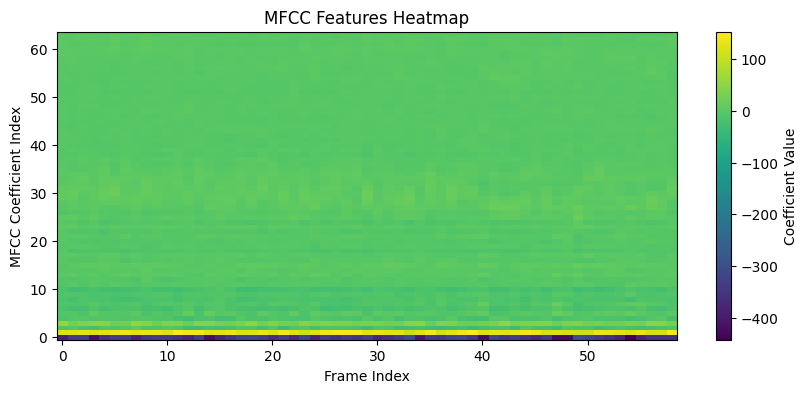

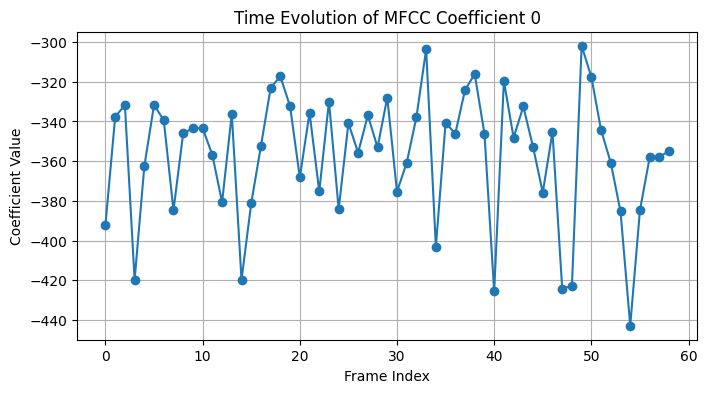

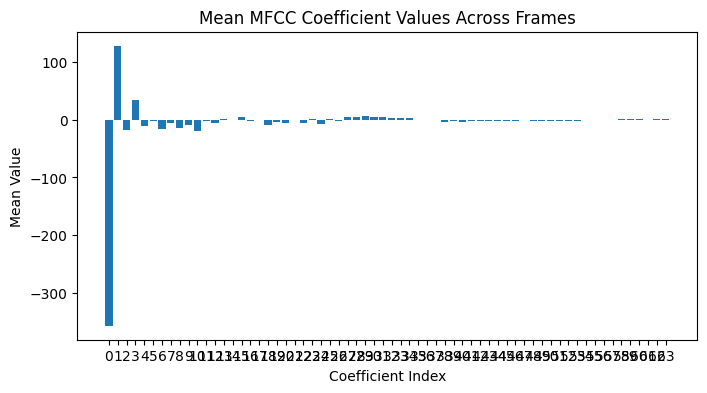

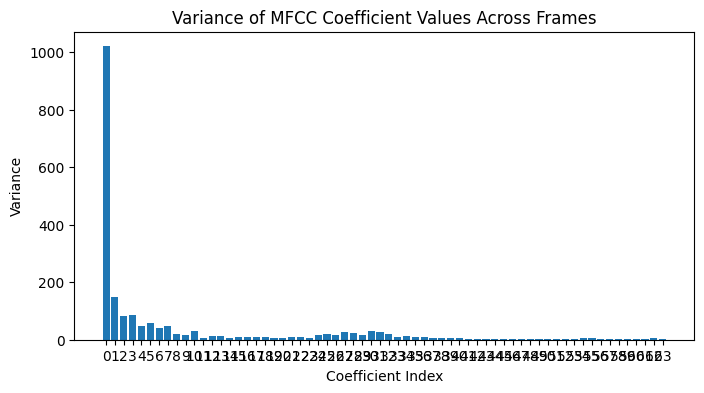

In [ ]:

# Replace 'mfcc' with your loaded NumPy array for one file.
# For demonstration, let's assume mfcc is already loaded.
# mfcc = np.load("your_file.npy")

plt.figure(figsize=(10, 4))
plt.imshow(mfcc_features.T, aspect='auto', origin='lower')
plt.title('MFCC Features Heatmap')
plt.xlabel('Frame Index')
plt.ylabel('MFCC Coefficient Index')
plt.colorbar(label='Coefficient Value')
plt.show()

'''mfcc.T: Transposes the matrix so that the coefficient indices are on the y-axis.

aspect='auto': Adjusts the aspect ratio for a better fit.

origin='lower': Places the lower coefficient indices at the bottom of the plot.'''


coeff_index = 0  # Change this to any coefficient index you want to analyze

plt.figure(figsize=(8, 4))
plt.plot(mfcc_features[:, coeff_index], marker='o')
plt.title(f'Time Evolution of MFCC Coefficient {coeff_index}')
plt.xlabel('Frame Index')
plt.ylabel('Coefficient Value')
plt.grid(True)
plt.show()

'''mfcc[:, coeff_index]: Extracts the selected coefficient values across all frames.

marker='o' and grid(True): Helps in visualizing individual data points clearly.'''

mean_values = np.mean(mfcc_features, axis=0)

plt.figure(figsize=(8, 4))
plt.bar(np.arange(len(mean_values)), mean_values)
plt.title('Mean MFCC Coefficient Values Across Frames')
plt.xlabel('Coefficient Index')
plt.ylabel('Mean Value')
plt.xticks(np.arange(len(mean_values)))
plt.show()

variance_values = np.var(mfcc_features, axis=0)

plt.figure(figsize=(8, 4))
plt.bar(np.arange(len(variance_values)), variance_values)
plt.title('Variance of MFCC Coefficient Values Across Frames')
plt.xlabel('Coefficient Index')
plt.ylabel('Variance')
plt.xticks(np.arange(len(variance_values)))
plt.show()

'''np.mean(mfcc, axis=0): Computes the mean for each coefficient (column).

np.var(mfcc, axis=0): Computes the variance for each coefficient.

Bar charts provide a quick way to compare the overall behavior (central tendency and variability) of the coefficients.'''

In [5]:
import numpy as np
import glob

# Specify the folder path that contains your .npy files
folder_path = "/home/hiddenrock/MPDD/MPDD-Elderly/Training/1s/Audio/mfccs"  # Update this path accordingly

# Use glob to get a list of all .npy files in the folder
npy_files = glob.glob(f"{folder_path}/*.npy")

# Loop through each file, load the content, and print details
for file in npy_files:
    print(f"Processing file: {file}")
    # Load the content of the file
    data = np.load(file)
    
    # Display the type, shape, and content of the data
    print("Type:", type(data))
    print("Shape:", data.shape)
    #print("Contents:")
    #print(data)
    print("\n" + "-" * 50 + "\n")


Processing file: /home/hiddenrock/MPDD/MPDD-Elderly/Training/1s/Audio/mfccs/39_A_1_audio_features.npy
Type: <class 'numpy.ndarray'>
Shape: (4, 64)

--------------------------------------------------

Processing file: /home/hiddenrock/MPDD/MPDD-Elderly/Training/1s/Audio/mfccs/77_A_1_audio_features.npy
Type: <class 'numpy.ndarray'>
Shape: (43, 64)

--------------------------------------------------

Processing file: /home/hiddenrock/MPDD/MPDD-Elderly/Training/1s/Audio/mfccs/26_A_3_audio_features.npy
Type: <class 'numpy.ndarray'>
Shape: (6, 64)

--------------------------------------------------

Processing file: /home/hiddenrock/MPDD/MPDD-Elderly/Training/1s/Audio/mfccs/33_A_2_audio_features.npy
Type: <class 'numpy.ndarray'>
Shape: (11, 64)

--------------------------------------------------

Processing file: /home/hiddenrock/MPDD/MPDD-Elderly/Training/1s/Audio/mfccs/67_A_3_audio_features.npy
Type: <class 'numpy.ndarray'>
Shape: (23, 64)

-------------------------------------------------

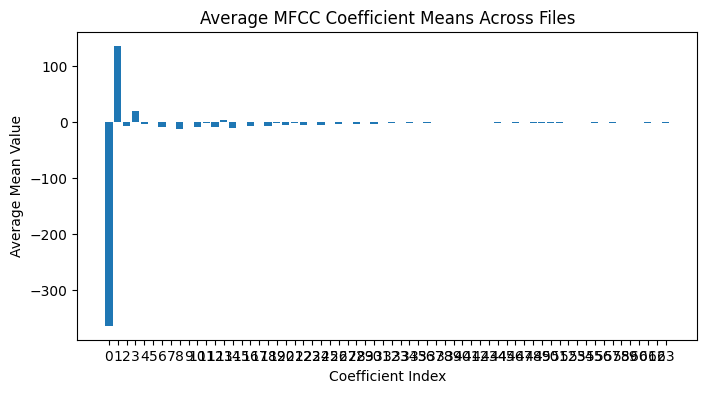

In [14]:
import glob
import numpy as np
import matplotlib.pyplot as plt

folder_path = "/home/hiddenrock/MPDD/MPDD-Elderly/Training/1s/Audio/mfccs"  # Update with your folder path
npy_files = glob.glob(f"{folder_path}/*.npy")

mean_coefficients = []  # To store mean values for each file

for file in npy_files:
    mfcc = np.load(file)
    mean_coefficients.append(np.mean(mfcc, axis=0))  # Each item is an array of 64 means

# Convert the list to a NumPy array for easy manipulation (shape: [num_files, 64])
mean_coefficients = np.array(mean_coefficients)

# Plot the mean for each coefficient across all files (averaged over files)
avg_means = np.mean(mean_coefficients, axis=0)
plt.figure(figsize=(8, 4))
plt.bar(np.arange(len(avg_means)), avg_means)
plt.title('Average MFCC Coefficient Means Across Files')
plt.xlabel('Coefficient Index')
plt.ylabel('Average Mean Value')
plt.xticks(np.arange(len(avg_means)))
plt.show()


WaV2Vec Features

In [15]:
import numpy as np
import glob

# Specify the folder path that contains your .npy files
folder_path = "/home/hiddenrock/MPDD/MPDD-Elderly/Training/1s/Audio/wav2vec"  # Update this path accordingly

# Use glob to get a list of all .npy files in the folder
npy_files = glob.glob(f"{folder_path}/*.npy")

# Loop through each file, load the content, and print details
for file in npy_files:
    print(f"Processing file: {file}")
    # Load the content of the file
    data = np.load(file)
    
    # Display the type, shape, and content of the data
    print("Type:", type(data))
    print("Shape:", data.shape)
    #print("Contents:")
    #print(data)
    print("\n" + "-" * 50 + "\n")


Processing file: /home/hiddenrock/MPDD/MPDD-Elderly/Training/1s/Audio/wav2vec/39_A_1_audio_features.npy
Type: <class 'numpy.ndarray'>
Shape: (4, 512)

--------------------------------------------------

Processing file: /home/hiddenrock/MPDD/MPDD-Elderly/Training/1s/Audio/wav2vec/77_A_1_audio_features.npy
Type: <class 'numpy.ndarray'>
Shape: (43, 512)

--------------------------------------------------

Processing file: /home/hiddenrock/MPDD/MPDD-Elderly/Training/1s/Audio/wav2vec/26_A_3_audio_features.npy
Type: <class 'numpy.ndarray'>
Shape: (6, 512)

--------------------------------------------------

Processing file: /home/hiddenrock/MPDD/MPDD-Elderly/Training/1s/Audio/wav2vec/33_A_2_audio_features.npy
Type: <class 'numpy.ndarray'>
Shape: (11, 512)

--------------------------------------------------

Processing file: /home/hiddenrock/MPDD/MPDD-Elderly/Training/1s/Audio/wav2vec/67_A_3_audio_features.npy
Type: <class 'numpy.ndarray'>
Shape: (23, 512)

----------------------------------

Each file contains a NumPy array where:

- **Rows (first dimension):** Represent the number of time steps (or frames) extracted from the audio file. Different audio files have different numbers of frames (e.g., 4, 43, 6, 11, 5) depending on factors like the duration of the audio and how the extraction process segments it.

- **Columns (second dimension):** Each row is a 512-dimensional feature vector produced by the Wav2Vec model. This 512-dimensional embedding is a high-level representation of the audio at that particular time step.

### What Does This Mean?

1. **Temporal Representation:**  
   The first dimension tells you how many segments or time steps the audio has been divided into during the feature extraction. A longer audio file or one with finer segmentation might have more frames.

2. **Feature Vector:**  
   The 512-dimensional vectors are the output of the Wav2Vec network. Each vector captures complex, learned representations of the audio signal, including phonetic, rhythmic, and possibly even linguistic information. These representations are typically used as inputs for downstream tasks like speech recognition or emotion analysis.

3. **Comparison with MFCCs:**  
   While MFCCs are handcrafted features designed to capture the spectral envelope of audio signals, Wav2Vec features are learned from large amounts of raw audio. This means they often encode richer information, but they are also less interpretable on a per-dimension basis.

### How to Use These Features?

- **Visualization:** You can visualize the features using heatmaps, similar to MFCCs (plotting the 512 dimensions across time) to see how the feature representations change over time.
  
- **Downstream Tasks:** These features can serve as inputs to machine learning or deep learning models for tasks like automatic speech recognition (ASR), speaker identification, or audio classification.

- **Analysis:** You might compute statistics (mean, variance) over the time steps for each feature dimension, compare different audio files, or perform clustering on the frame-level embeddings.

In summary, each file contains a set of high-level, 512-dimensional feature vectors, one for each time frame extracted from the audio file by the Wav2Vec model. These features are designed to capture nuanced details about the audio signal, making them useful for various advanced speech and audio processing applications.

OpenSmile Features

In [2]:
import numpy as np
import glob

# Specify the folder path that contains your .npy files
folder_path = "/home/hiddenrock/MPDD/MPDD-Elderly/Training/1s/Audio/opensmile"  # Update this path accordingly

# Use glob to get a list of all .npy files in the folder
npy_files = glob.glob(f"{folder_path}/*.npy")

# Loop through each file, load the content, and print details
for file in npy_files:
    print(f"Processing file: {file}")
    # Load the content of the file
    data = np.load(file)
    
    # Display the type, shape, and content of the data
    print("Type:", type(data))
    print("Shape:", data.shape)
    #print("Contents:")
    #print(data)
    print("\n" + "-" * 50 + "\n")


Processing file: /home/hiddenrock/MPDD/MPDD-Elderly/Training/1s/Audio/opensmile/39_A_1_audio_features.npy
Type: <class 'numpy.ndarray'>
Shape: (4, 6373)

--------------------------------------------------

Processing file: /home/hiddenrock/MPDD/MPDD-Elderly/Training/1s/Audio/opensmile/77_A_1_audio_features.npy
Type: <class 'numpy.ndarray'>
Shape: (43, 6373)

--------------------------------------------------

Processing file: /home/hiddenrock/MPDD/MPDD-Elderly/Training/1s/Audio/opensmile/26_A_3_audio_features.npy
Type: <class 'numpy.ndarray'>
Shape: (6, 6373)

--------------------------------------------------

Processing file: /home/hiddenrock/MPDD/MPDD-Elderly/Training/1s/Audio/opensmile/33_A_2_audio_features.npy
Type: <class 'numpy.ndarray'>
Shape: (11, 6373)

--------------------------------------------------

Processing file: /home/hiddenrock/MPDD/MPDD-Elderly/Training/1s/Audio/opensmile/67_A_3_audio_features.npy
Type: <class 'numpy.ndarray'>
Shape: (23, 6373)

-------------------

Utterance-level acoustic features extracted by OpenSMILE represent a global, comprehensive summary of an entire audio clip. Here’s what this means given your (shape, 6373) embedding:

---

### 1. What Is OpenSMILE?

OpenSMILE (open-source Speech and Music Interpretation by Large-space Extraction) is a widely used toolkit for feature extraction from audio. It’s particularly popular in fields like emotion recognition, speech analysis, and paralinguistic studies. OpenSMILE can extract both low-level descriptors (LLDs) and higher-level statistical functionals.

---

### 2. Low-Level Descriptors (LLDs) vs. Statistical Functionals

- **Low-Level Descriptors (LLDs):**  
  These are features extracted from short frames (e.g., 20–40 milliseconds) of the audio. They include parameters like:
  - Pitch (fundamental frequency)
  - Energy (intensity)
  - Spectral properties (such as spectral centroid, bandwidth, flux)
  - Formants, Mel-frequency cepstral coefficients (MFCCs), and more

- **Statistical Functionals:**  
  Rather than keeping the frame-by-frame details, OpenSMILE typically summarizes the LLDs over an entire utterance by computing statistics such as:
  - Mean
  - Standard deviation
  - Minimum, Maximum
  - Percentiles
  - Other higher-order moments (e.g., skewness, kurtosis) and custom functionals

By applying these functionals to each LLD, you transform a variable-length series of frame-level features into a fixed-length vector—the utterance-level feature vector.

---

### 3. What Does a 6373-Dimensional Embedding Mean?

- **High Dimensionality:**  
  A vector of 6373 values means that the extraction configuration was very comprehensive.  
- **Feature Count:**  
  Each dimension in this vector corresponds to a particular statistical characteristic calculated over one of the LLDs. For instance, if you have 100 different LLDs and you compute 60 functionals (or a combination of different functionals) for each, you could end up with 100 × 60 = 6000 features, plus possibly additional features, reaching the final count of 6373.
- **Global Descriptor:**  
  This vector encapsulates a wide range of acoustic properties such as prosody, intonation, voice quality, spectral characteristics, and more, all summarized at the utterance level.  

---

### 4. Use Cases for Such Features

- **Emotion and Paralinguistic Analysis:**  
  The rich, high-dimensional representation is particularly useful in tasks like emotion recognition, speaker state analysis, or other forms of affective computing where nuanced acoustic cues are important.
- **Machine Learning Inputs:**  
  These features can be used as input to various machine learning models, allowing them to learn correlations between the acoustic characteristics and the target variable (such as an emotional state or a speaker identity).
- **Comparative Studies:**  
  High-dimensional feature sets allow for detailed comparisons between utterances, which can be useful in clustering or similarity analysis tasks.

---

### Summary

The (6373,) shaped features from OpenSMILE mean that for each entire audio utterance, you have a vector with 6373 different dimensions. Each dimension is the result of applying a statistical measure (functionals) to various low-level acoustic features extracted over the entire audio signal. This high-dimensional representation is designed to capture a wide variety of acoustic properties and is commonly used in tasks requiring detailed acoustic analysis.

Data preview:
  id  binary_depression  tri_depression  HAMD_24  PHQ_9  \
1  1                  0               0      4.0    2.0   
2  2                  1               2     38.0   15.0   
3  3                  1               2     36.0   12.0   
4  4                  1               2     21.0    7.0   
5  5                  0               1     15.0    3.0   

                                         big5_traits  \
1  {'Extraversion': 1, 'Agreeableness': 0, 'Openn...   
2  {'Extraversion': 0, 'Agreeableness': 1, 'Openn...   
3  {'Extraversion': 0, 'Agreeableness': 1, 'Openn...   
4  {'Extraversion': 0, 'Agreeableness': 1, 'Openn...   
5  {'Extraversion': 0, 'Agreeableness': 1, 'Openn...   

                                         big5_scores  \
1  {'Extraversion': 12.0, 'Agreeableness': 9.0, '...   
2  {'Extraversion': 8.0, 'Agreeableness': 14.0, '...   
3  {'Extraversion': 6.0, 'Agreeableness': 10.0, '...   
4  {'Extraversion': 13.0, 'Agreeableness': 14.0, ...   
5  {'Extravers

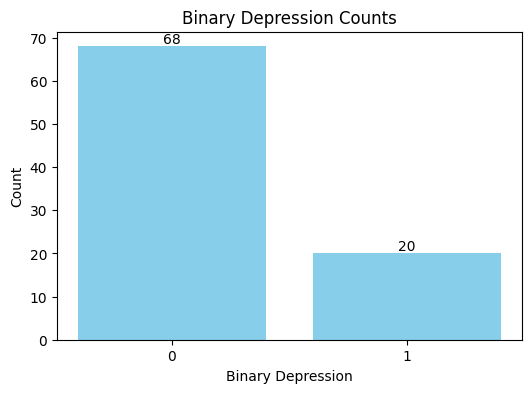

Binary Depression Stats:
0    68
1    20
Name: binary_depression, dtype: int64


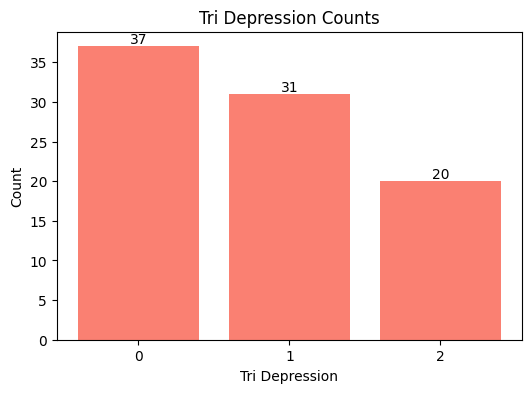

Tri Depression Stats:
0    37
1    31
2    20
Name: tri_depression, dtype: int64


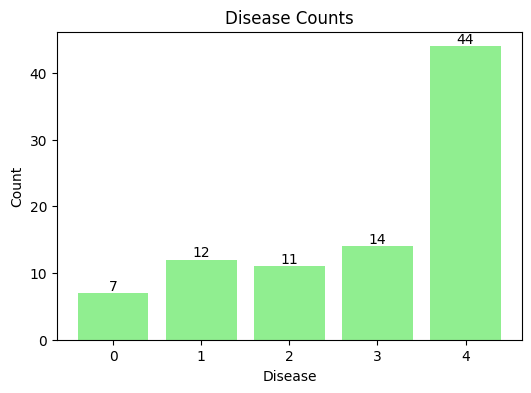

Disease Stats:
0     7
1    12
2    11
3    14
4    44
Name: disease, dtype: int64


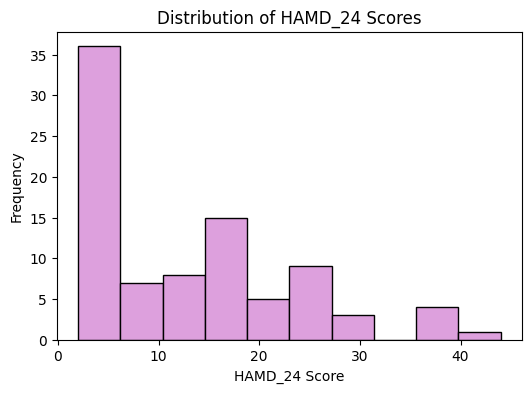

HAMD_24 Score Statistics:
Min:     2.0
Max:     44.0
Mean:    13.181818181818182
Median:  11.0


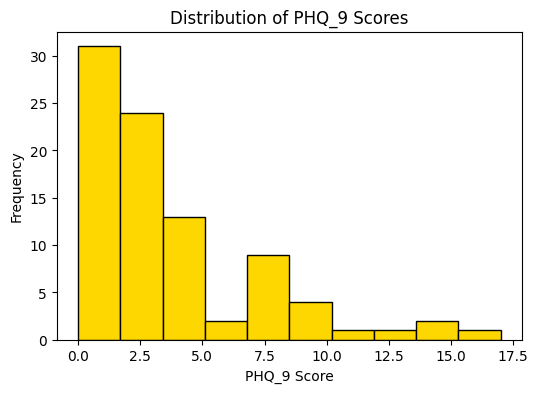

PHQ_9 Score Statistics:
Min:     0.0
Max:     17.0
Mean:    3.6136363636363638
Median:  2.5


In [4]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Load the JSON file (change the file name/path as needed)
with open('/home/hiddenrock/MPDD/MPDD-Elderly/Training/labels/personalized_train.json', 'r') as f:
    data = json.load(f)

# Convert the JSON data into a DataFrame
df = pd.DataFrame.from_dict(data, orient='index')

# Display the first few rows of the DataFrame for an overview
print("Data preview:")
print(df.head())

# -----------------------------------------------------
# Plot 1: Binary Depression Counts + Statistics Annotation
# -----------------------------------------------------
binary_counts = df['binary_depression'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
bars = plt.bar(binary_counts.index.astype(str), binary_counts.values, color='skyblue')
plt.xlabel('Binary Depression')
plt.ylabel('Count')
plt.title('Binary Depression Counts')

# Annotate each bar with its count
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             int(bar.get_height()), ha='center', va='bottom')
plt.show()

print("Binary Depression Stats:")
print(binary_counts)  # This prints the count for each binary label

# -----------------------------------------------------
# Plot 2: Tri Depression Counts + Statistics Annotation
# -----------------------------------------------------
tri_counts = df['tri_depression'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
bars = plt.bar(tri_counts.index.astype(str), tri_counts.values, color='salmon')
plt.xlabel('Tri Depression')
plt.ylabel('Count')
plt.title('Tri Depression Counts')

# Annotate bars with counts
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             int(bar.get_height()), ha='center', va='bottom')
plt.show()

print("Tri Depression Stats:")
print(tri_counts)

# -----------------------------------------------------
# Plot 3: Disease Counts + Statistics Annotation
# -----------------------------------------------------
disease_counts = df['disease'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
bars = plt.bar(disease_counts.index.astype(str), disease_counts.values, color='lightgreen')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.title('Disease Counts')

# Annotate bars with their counts
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             int(bar.get_height()), ha='center', va='bottom')
plt.show()

print("Disease Stats:")
print(disease_counts)

# -----------------------------------------------------
# Plot 4: HAMD_24 Score Distribution + Descriptive Statistics
# -----------------------------------------------------
plt.figure(figsize=(6, 4))
n, bins, patches = plt.hist(df['HAMD_24'], bins=10, color='plum', edgecolor='black')
plt.xlabel('HAMD_24 Score')
plt.ylabel('Frequency')
plt.title('Distribution of HAMD_24 Scores')
plt.show()

print("HAMD_24 Score Statistics:")
print("Min:    ", df['HAMD_24'].min())
print("Max:    ", df['HAMD_24'].max())
print("Mean:   ", df['HAMD_24'].mean())
print("Median: ", df['HAMD_24'].median())

# -----------------------------------------------------
# Plot 5: PHQ_9 Score Distribution + Descriptive Statistics
# -----------------------------------------------------
plt.figure(figsize=(6, 4))
n, bins, patches = plt.hist(df['PHQ_9'], bins=10, color='gold', edgecolor='black')
plt.xlabel('PHQ_9 Score')
plt.ylabel('Frequency')
plt.title('Distribution of PHQ_9 Scores')
plt.show()

print("PHQ_9 Score Statistics:")
print("Min:    ", df['PHQ_9'].min())
print("Max:    ", df['PHQ_9'].max())
print("Mean:   ", df['PHQ_9'].mean())
print("Median: ", df['PHQ_9'].median())


Data preview:
  id        audio_feature_path        video_feature_path  bin_category  \
0  1  1_A_1_audio_features.npy  1_V_1_video_features.npy             0   
1  1  1_A_2_audio_features.npy  1_V_2_video_features.npy             0   
2  1  1_A_3_audio_features.npy  1_V_3_video_features.npy             0   
3  1  1_A_4_audio_features.npy  1_V_4_video_features.npy             0   
4  2  2_A_1_audio_features.npy  2_V_1_video_features.npy             1   

   tri_category  pen_category  
0             0             0  
1             0             0  
2             0             0  
3             0             0  
4             2             3  


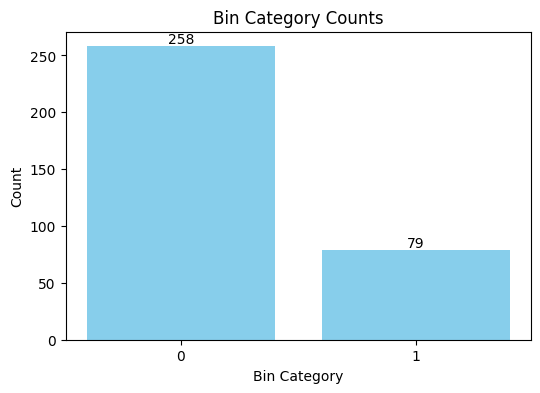


Bin Category Statistics:
0    258
1     79
Name: bin_category, dtype: int64

Descriptive Stats for 'bin_category':
count    337.000000
mean       0.234421
std        0.424267
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: bin_category, dtype: float64


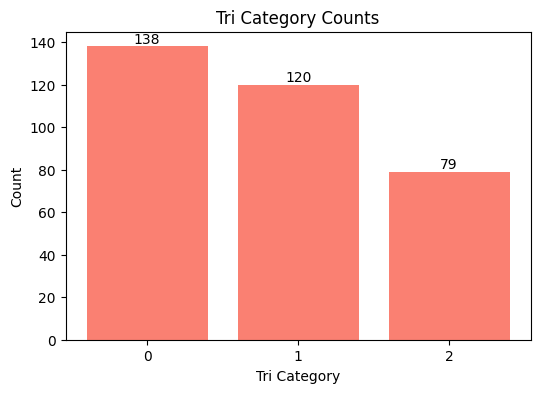


Tri Category Statistics:
0    138
1    120
2     79
Name: tri_category, dtype: int64

Descriptive Stats for 'tri_category':
count    337.000000
mean       0.824926
std        0.784277
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        2.000000
Name: tri_category, dtype: float64


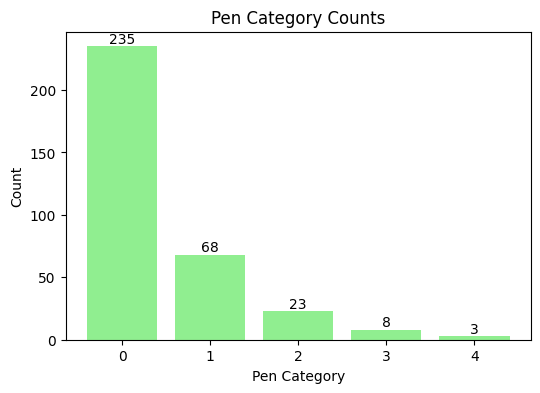


Pen Category Statistics:
0    235
1     68
2     23
3      8
4      3
Name: pen_category, dtype: int64

Descriptive Stats for 'pen_category':
count    337.000000
mean       0.445104
std        0.796634
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        4.000000
Name: pen_category, dtype: float64


In [5]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Load the JSON file (adjust the filename/path as needed)
with open('/home/hiddenrock/MPDD/MPDD-Elderly/Training/labels/Training_Validation_files.json', 'r') as f:
    data = json.load(f)

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(data)

# Preview the data
print("Data preview:")
print(df.head())

# ----------------------------------------------------
# Plot 1: Bin Category Counts and Statistics
# ----------------------------------------------------
bin_counts = df['bin_category'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
bars = plt.bar(bin_counts.index.astype(str), bin_counts.values, color='skyblue')
plt.xlabel('Bin Category')
plt.ylabel('Count')
plt.title('Bin Category Counts')

# Annotate each bar with its count
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             int(bar.get_height()), ha='center', va='bottom')
plt.show()

print("\nBin Category Statistics:")
print(bin_counts)
print("\nDescriptive Stats for 'bin_category':")
print(df['bin_category'].describe())

# ----------------------------------------------------
# Plot 2: Tri Category Counts and Statistics
# ----------------------------------------------------
tri_counts = df['tri_category'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
bars = plt.bar(tri_counts.index.astype(str), tri_counts.values, color='salmon')
plt.xlabel('Tri Category')
plt.ylabel('Count')
plt.title('Tri Category Counts')

# Annotate each bar with its count
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             int(bar.get_height()), ha='center', va='bottom')
plt.show()

print("\nTri Category Statistics:")
print(tri_counts)
print("\nDescriptive Stats for 'tri_category':")
print(df['tri_category'].describe())

# ----------------------------------------------------
# Plot 3: Pen Category Counts and Statistics
# ----------------------------------------------------
pen_counts = df['pen_category'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
bars = plt.bar(pen_counts.index.astype(str), pen_counts.values, color='lightgreen')
plt.xlabel('Pen Category')
plt.ylabel('Count')
plt.title('Pen Category Counts')

# Annotate each bar with its count
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             int(bar.get_height()), ha='center', va='bottom')
plt.show()

print("\nPen Category Statistics:")
print(pen_counts)
print("\nDescriptive Stats for 'pen_category':")
print(df['pen_category'].describe())
